In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

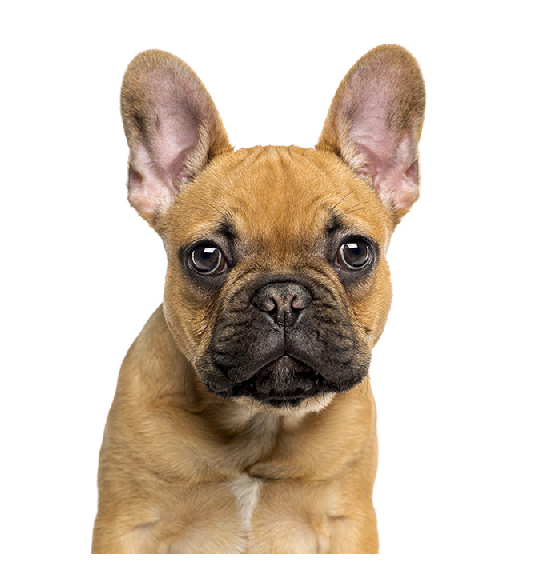

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 10))
img = image.load_img('10.jpg')
img = image.img_to_array(img)
ax.imshow(img / 255.) 
ax.axis('off')
plt.show()

In [9]:
from PIL import Image
newwidth, newheight = 224, 224
img = Image.open('10.jpg').convert('L')
img = img.resize((newwidth, newheight), Image.ANTIALIAS)
img_as_np = np.asarray(img)
arr = img_as_np.ravel()
arr = np.array([arr])

arr = arr.reshape(arr.shape[0], 224, 224, 3)
arr = arr.astype('float32')
arr /= 255

ValueError: cannot reshape array of size 50176 into shape (1,224,224,3)

[[('n02108915', 'French_bulldog', 0.99660093),
  ('n02096585', 'Boston_bull', 0.0012307451),
  ('n02112706', 'Brabancon_griffon', 0.00033264412),
  ('n02108422', 'bull_mastiff', 0.00033001107),
  ('n03803284', 'muzzle', 0.00014060034)]]

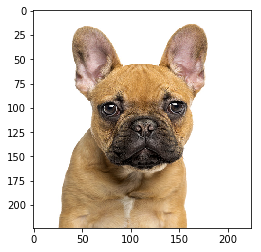

In [11]:
resnet = ResNet50(weights='imagenet')
resnet.save('resnet.h5')
resnet.save_weights('resnet_weight.h5')
img = image.load_img('10.jpg', target_size=(224, 224))
img = image.img_to_array(img)
plt.imshow(img / 255.)
x = preprocess_input(np.expand_dims(img.copy(), axis=0))
preds = resnet.predict(x)
decode_predictions(preds, top=5)

In [17]:
type(img)

numpy.ndarray

In [25]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.save('VGG16.h5')
model.save_weights('VGG16_weights')

img_path = '10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

In [15]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
model.save('VGG19.h5')
model.save_weights('VGG19_weights.h5')

img_path = '10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

Exception: URL fetch failure on https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5: None -- [WinError 10054] An existing connection was forcibly closed by the remote host

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit_generator(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(...)

In [8]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

# this could also be the output a different Keras model or layer
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'

model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)
model.save('InceptionV3.h5')
model.save_weights('InceptionV3_weights.h5')

96075776/96112376 [============================>.] - ETA: 0s

In [19]:
import keras
from keras.applications import inception_resnet_v2
model = InceptionResNetV2.InceptionResNetV2(include_top=True, weights='imagenet')

model.save('InceptionResNetV2.h5')
model.save_weights('InceptionResNetV2_weights.h5')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

ImportError: cannot import name 'inception_resnet_v2'

In [ ]:
model = InceptionV3(include_top=True, weights='imagenet')

model.save('InceptionV3.h5')
model.save_weights('InceptionV3_weights.h5')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

In [ ]:
for r in [128, 160, 192, 224]:
        for a in [0.25, 0.50, 0.75, 1.0]:
            if r == 224:
                model = MobileNet(include_top=True, weights='imagenet',
                                  input_shape=(r, r, 3), alpha=a)
                
                model.save('MobileNet.h5')
                model.save_weights('MobileNet_weights.h5')


                img_path = 'elephant.jpg'
                img = image.load_img(img_path, target_size=(r, r))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                print('Input image shape:', x.shape)

                preds = model.predict(x)
                print(np.argmax(preds))
                print('Predicted:', decode_predictions(preds, 1))

            model = MobileNet(include_top=False, weights='imagenet')

In [ ]:
model = MusicTaggerCRNN(weights='msd')
model.save('MusicTaggerCRNN.h5')
model.save_weights('MusicTaggerCRNN_weights.h5')

audio_path = 'audio_file.mp3'
melgram = preprocess_input(audio_path)
melgrams = np.expand_dims(melgram, axis=0)

preds = model.predict(melgrams)
print('Predicted:')
print(decode_predictions(preds))

In [ ]:
model = VGG16(include_top=True, weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

In [1]:
model = VGG19(include_top=True, weights='imagenet')
model.save('VGG19.h5')
model.save_weights('VGG19_weights.h5')

img_path = '10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))


NameError: name 'VGG19' is not defined

In [6]:
from keras.applications.xception import Xception
model = Xception(include_top=True, weights='imagenet')
model.save('Xception.h5')
model.save_weights('Xception_weights.h5')
img_path = '10.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print(np.argmax(preds))
print('Predicted:', decode_predictions(preds, 5))

Input image shape: (1, 299, 299, 3)
659
Predicted: [[('n03775546', 'mixing_bowl', 1.0), ('n04127249', 'safety_pin', 8.5072305e-12), ('n02112350', 'keeshond', 1.1660242e-13), ('n04380533', 'table_lamp', 2.829511e-15), ('n04357314', 'sunscreen', 2.1143796e-20)]]
